VAMOS A REALIZAR UN EDA COMPLETA, OBSERVAMOS QUE SE TRATA DE UNA BASE DE DATOS  DE CLASIFICACION

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", sep = ",")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data.shape

(768, 9)

In [4]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(total_data.duplicated().sum())

0


NO TENEMOS VALORES DUPLICADOS Y NO VAMOS A ELIMINAR NIGUNA VARIBLE

ANALISIS VARIABLES UNIVARIANTE- ANALISIS DE VARIALES NUMERICAS

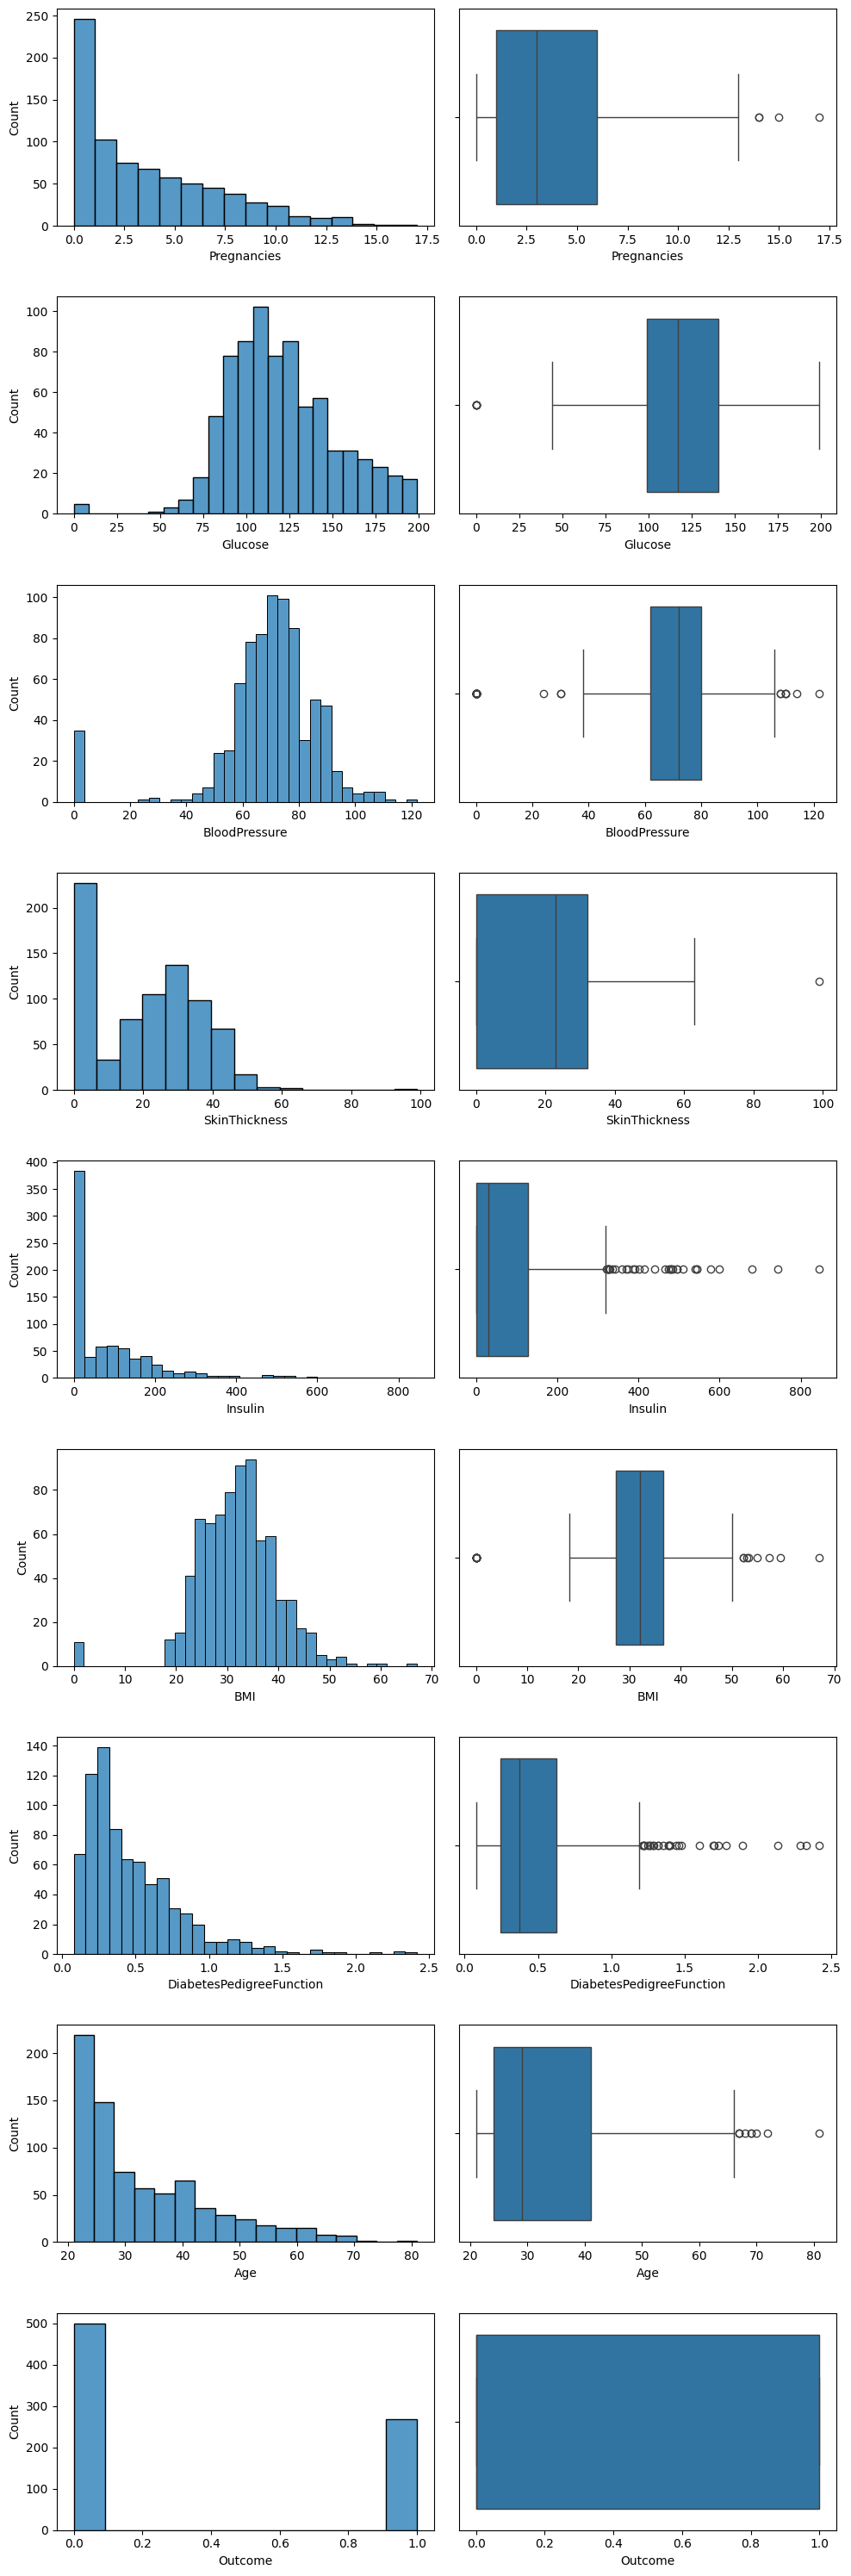

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 8 filas y 2 columnas
fig, axes = plt.subplots(9, 2, figsize=(10, 30))

# Características a visualizar
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Bucle para crear gráficos para cada característica
for i, feature in enumerate(features):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=total_data, x=feature)
    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=total_data, x=feature)

# Ajustar el diseño para evitar superposiciones y dar más espacio a las etiquetas
plt.tight_layout(h_pad=2.5)

# Mostrar el gráfico
plt.show()


observamos que la mayoria de las variables cuentan con valores atipicos , sobre todo la funcion de pedrigí de diabetes

VEMOS AHORA LAS CORRELACIONES

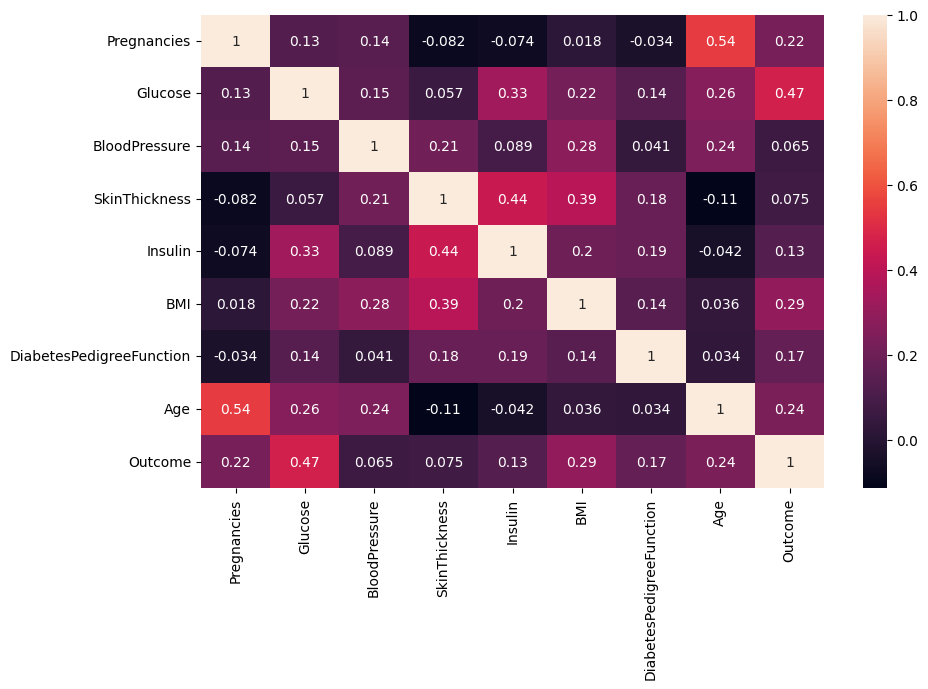

In [62]:
fig, axis = plt.subplots(figsize = (10,7))
sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True)
plt.tight_layout()
plt.show()

con la matriz de correlaciones observamos que la variable mas correlacionada es la GLucosa seguido del BMI, y la que menos tiene relacon es la Presion alterial y el grosor del pliegue cutánneo


VAMOS A ESTUDIAR LOS OUTLIERS

In [64]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


como vimos en los boxplot he indica la grafica de arriba son la INSULINA y la Funcion pedigrí de diabetes quienes contienen mas outliers, pero en este caso no los vamos a eliminar

In [65]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no tenemos valores nulos, en el caso de los Decision Trees no es necesario el escalo de variables por lo que solo diviremos el data set en train y test
y seleccionares los k best

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from pickle import dump, load

scaler = StandardScaler()

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.to_csv("../data/processed/train_X.csv", index=False)

with open("../data/processed/train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))

X_test.to_csv("../data/processed/test_X.csv", index=False)

with open("../data/processed/test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))

dump(scaler, open("../models/modelsinescala.pk", "wb"))
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


SELLECCIONAMOS LOS K BEST

In [67]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel.to_csv("../data/processed/train_X_sel.csv", index=False)
X_test_sel.to_csv("../data/processed/test_X_sel.csv", index=False)
dump(selection_model, open("../models//selection_model.pk", "wb"))
X_train_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,0.0,21.0
1,9.0,112.0,28.2,50.0
2,1.0,139.0,28.7,22.0
3,0.0,161.0,21.9,65.0
4,6.0,134.0,46.2,46.0


In [ ]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)